## Figure 3 : MIC

In [2]:
## libraries

library(dplyr)
library(tidyverse)
library(tidyr)
library(ggtree)
library(ggnewscale)
library(treeio)
library(phytools)
library(cowplot)
# library(magick)
library(ggpubr)

In [3]:
mic <- read.csv("mic3.csv")[,-1]
mic3_long <- mic  %>%
  pivot_longer(!AETdiff, names_to = "Antibiotic", values_to = "MIC")
mic3_long$MIC <- as.factor(mic3_long$MIC)
# levels(mic3_long$MIC)
mic3_long$MIC <- factor(mic3_long$MIC, levels = c('0.0125','0.0312','0.0625','0.125','0.25','0.5','1','2','4','8','16',
                                '32','64','128','256'))


In [4]:
mic3_long$AETdiff <- as.factor(mic3_long$AETdiff)
antibiotics <- levels(factor((mic3_long$Antibiotic)))
data.frame(table(mic3_long$Antibiotic))$Var1

mict <- data.frame(ab = data.frame(table(mic3_long$Antibiotic))$Var1,
h=c(32,16,16,2,0,16,8,4,4,4,8,64))
mic3_long <- merge(mic3_long,mict,by.x = "Antibiotic",by.y = "ab")

[1] AMK ATM CAZ CIP COL FEP GEN IPM LEV MEM TOB TZP
Levels: AMK ATM CAZ CIP COL FEP GEN IPM LEV MEM TOB TZP

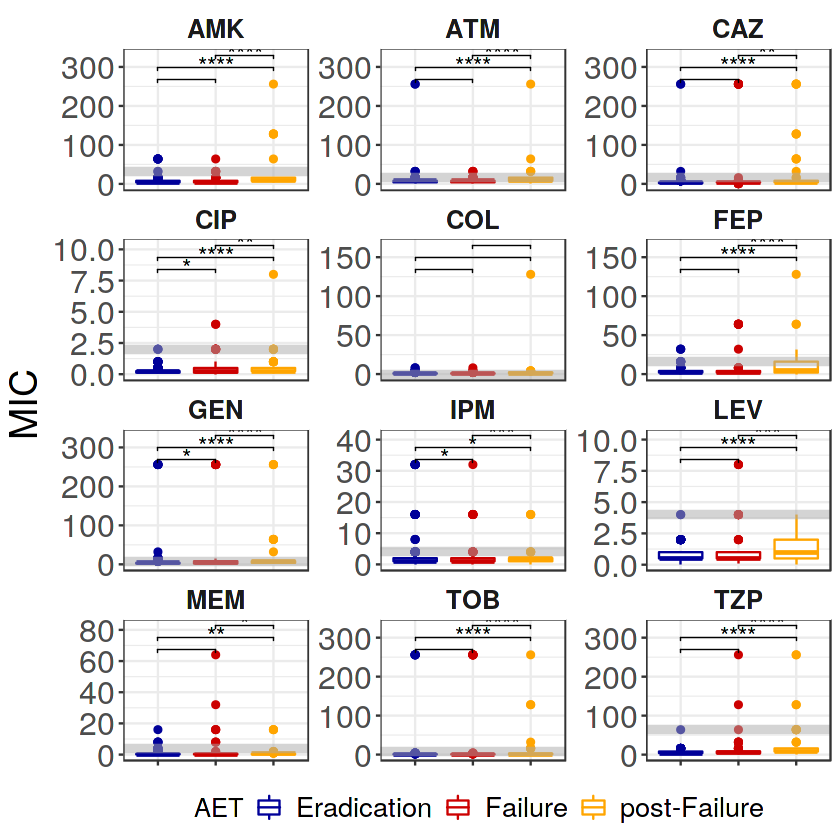

In [6]:
options(repr.plot.width=7, repr.plot.height=7)


my_comparisons <- list(c("0", "1"),c("0", "2"),c("1", "2"))

mic_box <- ggplot(mic3_long)+
aes(x=AETdiff,y=as.numeric(as.character(MIC)), color=AETdiff, fill=AETdiff)+
  geom_boxplot(fill="white")+
#   geom_point(aes(fill = R_AET), size = 1, shape = 21, position = position_jitterdodge()) +
geom_hline(data = mic3_long, aes(yintercept = h), linetype='solid',size=2,colour="darkgrey",alpha=0.5)+
 stat_compare_means(comparisons = my_comparisons,label.x = 0,label= "p.signif",
                    hide.ns = TRUE, size=5,vjust = 0.5)+
 facet_wrap(~Antibiotic, ncol=3,scales = "free_y")+ 
theme_bw()+
scale_x_discrete(labels= c('E', 'F','pF'))+
scale_color_manual(labels=c("Eradication","Failure", "post-Failure"),values = c("#000099","#CC0000","orange"))+
labs(color="AET")+
ylab("MIC")+
theme(axis.text.x = element_blank(),
     axis.text.y=element_text(size=19),
     axis.title.y=element_text(size=23),
     axis.title.x=element_blank())+
theme(strip.text.x = element_text(size = 15,face="bold"))+
theme(   strip.placement = "outside",
   strip.background = element_rect(
     color="white", fill="white", size=0, linetype="solid"))+
theme(legend.position = "bottom",
     legend.title = element_text( size = 15),
  legend.text = element_text(size = 16))
# theme(legend.position = c(0.9, 0.2))+
#   theme(
#   legend.title = element_text( size = 14),
#   legend.text = element_text(size = 15)
#   )
mic_box
# ggsave('mic_box.png', device = 'png', dpi = 450,width = 15,height = 15)
ggsave('Figure3.png', device = 'png', dpi = 450,width = 10,height = 10)